# Finding the Best Markets to Advertise In

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
pd.options.display.max_columns = 150
print(data.shape)

(18175, 136)


In [4]:
data.head(4)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Checking for Sample Representativity

In [5]:
data['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                       11.770595
  Front-End Web Developer                                                                                                                                                                       6.435927
  Data Scientist                                                                                                                                                                                2.173913
Back-End Web Developer                                                                                                                                                                          2.030892
  Mobile Developer                                                                                                                                                                              1.67

In [6]:
interests_no_nulls = data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

In [7]:
splitted_interests

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

In [8]:
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


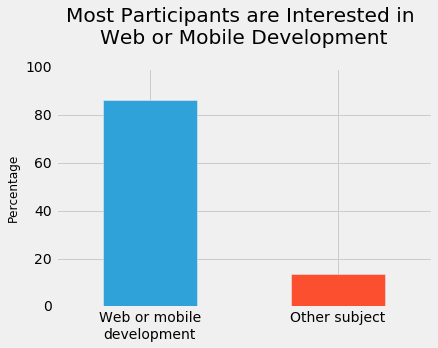

In [9]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

# New Coders - Locations and Densities

In [10]:
fcc_good = data[data['JobRoleInterest'].notnull()].copy()


absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100

pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


# Spending Money for Learning

In [11]:
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)

fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()

675

In [12]:
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]

In [13]:
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

fcc_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [14]:
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

# Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


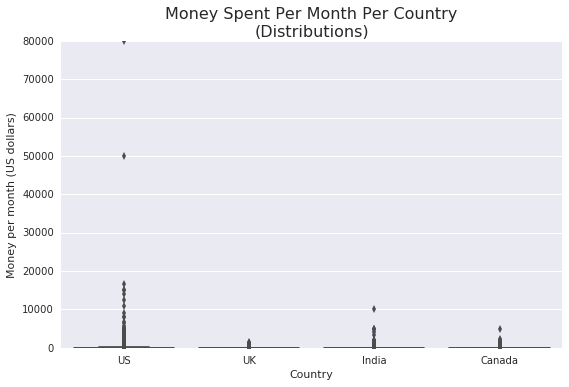

In [15]:
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [16]:
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

In [17]:
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

In [18]:
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-18-15e34c95b39b>, line 9)

In [ ]:
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['money_per_month'] >= 2500)]
india_outliers

In [ ]:
only_4 = only_4.drop(india_outliers.index)

In [ ]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000)]

us_outliers

In [ ]:
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [ ]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_per_month'] > 4500)]

canada_outliers

In [ ]:
only_4 = only_4.drop(canada_outliers.index)

In [ ]:
only_4.groupby('CountryLive').mean()['money_per_month']

In [ ]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

# Choosing the Two Best Markets

In [ ]:
only_4['CountryLive'].value_counts(normalize = True) * 100